<a href="https://colab.research.google.com/github/Martine1grace/NLP_FELLOWSHIP_AI-Machine_Translation.-/blob/main/wee6/%202day/Simple_NN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn torch matplotlib

In [ ]:
from sklearn.datasets import make_classification
import numpy as np

In [ ]:
X, Y = make_classification(
    n_features=4, n_redundant=0, n_informative=3, n_clusters_per_class=2, n_classes=3
)

In [ ]:
import matplotlib.pyplot as plt

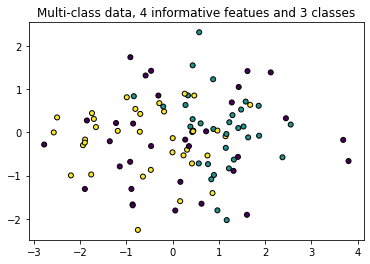

In [ ]:
plt.title("Multi-class data, 4 informative featues and 3 classes", fontsize="large")
plt.scatter(X[:,0], X[:,1], marker="o", c=Y, s=25, edgecolor="k")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, Y_train, Y_test

In [ ]:
len(X_train[0]) #Input Shape

4

In [ ]:
len(set(Y_train)) #Output classes/shape

3

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
#Construction of a dataset class
class Data(Dataset):
  def __init__(self):
    self.X = torch.from_numpy(X_train) #Pass the X/Or Input variables
    self.Y = torch.from_numpy(Y_train) #Pass the Y/Label 
    self.len = self.X.shape[0] #Equal to 4

  def __getitem__(self, index):
    return self.X[index], self.Y[index]

  def __len__(self):
    return self.len

data = Data()
loader=DataLoader(dataset=data, batch_size=64)

In [ ]:
input_shape = len(X_train[0]) #Shape of the input

In [ ]:
num_classes = len(set(Y_train)) #Output classes/shape

In [ ]:
#Neural Network Hyperparamters

batch_size = 64
lr = 1e-3
epochs = 5
input_dim = input_shape#Shape of the input data or 4
hidden_dim = 24
output_dim = num_classes

In [ ]:
from torch import nn

In [ ]:
class Net(nn.Module):
  def __init__(self, hidden_dim, input_dim=input_shape, output_dim=num_classes):
    super(Net, self ).__init__() #Initialise the neural network class
    #Create the layers
    #model.layer(Dense(3, input_shape=5, )) #Keras way
    self.layer_1 = nn.Linear(input_dim, hidden_dim)
    self.layer_2 = nn.Linear(hidden_dim, output_dim)


  def forward(self, X):
    layer_1_forward = self.layer_1(X) #Forward the data into the 1st hidden layer
    layer_1_output = torch.sigmoid(layer_1_forward) #Pass the out of the 1st hidden layer into the sigmoid activation function
    output_layer_2 =self.layer_2(layer_1_output) #forward the data into the 2nd hidden layer
    return output_layer_2


In [ ]:
clf = Net( hidden_dim, input_dim, output_dim)

In [ ]:
print(clf.parameters)

<bound method Module.parameters of Net(
  (layer_1): Linear(in_features=4, out_features=24, bias=True)
  (layer_2): Linear(in_features=24, out_features=3, bias=True)
)>


In [ ]:
criterion = nn.CrossEntropyLoss() #loss function
optimizer = torch.optim.SGD(clf.parameters(), lr=0.1) #optimizer

In [ ]:
learning_rate =  lr
loss_list = [] #Record each loss in each epoch

for epoch in range(epochs):
  y_pred = clf(data.X.float()) #Forward the data to the output layer
  loss = criterion(y_pred, data.Y)     #calculate the difference between the Ypred:prediction and the Y:Target
  loss_list.append(loss.item()) #add the loss metric to the list
  clf.zero_grad() # reset the gradient descent algorithm
  loss.backward() #backward propagation
  with torch.no_grad():
    for param in clf.parameters():
      param = param - (learning_rate * param.grad)

In [ ]:
loss_list[0]

1.0930578708648682

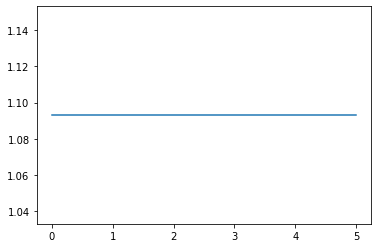

In [ ]:
step = np.linspace(0, epochs, epochs)
plt.plot(step, np.array(loss_list))